# Exploratory Data Analysis (EDA) :
EDA is an approach for summarizing, visualizing, and becoming intimately familiar with the important characteristics of a data set, and its performed in order to define and refine the selection of feature variables that will be used for machine learning.

Exploratory Data Analysis is majorly performed using the following methods:

   ## Univariate analysis:
    provides summary statistics for each field in the raw data set (or) summary only on one variable.Ex:- CDF,PDF,Box plot, Violin plot.(dont worry, will see below what each of them is)
    
   ## Bivariate analysis:
    is performed to find the relationship between each variable in the dataset and the target variable of  interest (or) using 2 variables and finding realtionship between them.Ex:-Box plot,Voilin plot.
    
   ## Multivariate analysis:
    is performed to understand interactions between different fields in the dataset (or) finding interactions between variables more than 2. Ex:- Pair plot and 3D scatter plot.



In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

In [2]:
#loading_data
data=pd.read_csv("wine.csv")
data.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
data.drop(["a"], axis=1, inplace=True)
data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Univariate Analysis

In [3]:
#lets get an overview and some statistics of dataset
data.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
#number of rows and columns
data.shape

(1599, 12)

In [5]:
data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

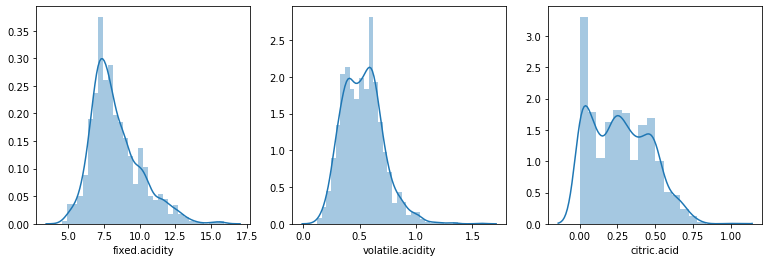

In [6]:
Global_Salesfig, axs = plt.subplots(ncols = 3, figsize=(13, 4))
sns.distplot (data["fixed.acidity"],ax=axs[0],kde=True)
sns.distplot(data["volatile.acidity"],ax=axs[1],kde=True)
sns.distplot(data["citric.acid"],ax=axs[2],kde=True)

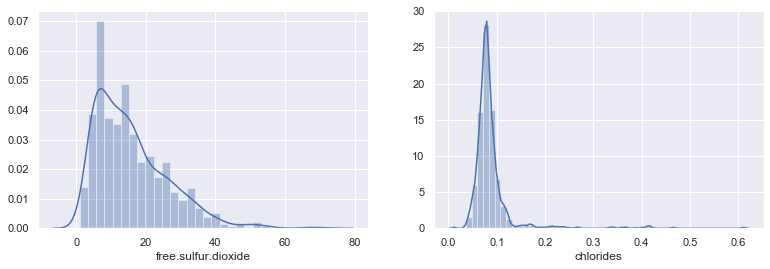

In [19]:
Global_Salesfig, axs = plt.subplots(ncols = 2, figsize=(13, 4))
sns.distplot (data["free.sulfur.dioxide"],ax=axs[0],kde=True)
sns.distplot(data["chlorides"],ax=axs[1],kde=True)

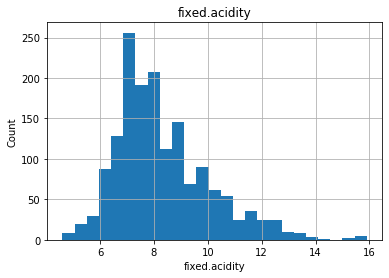

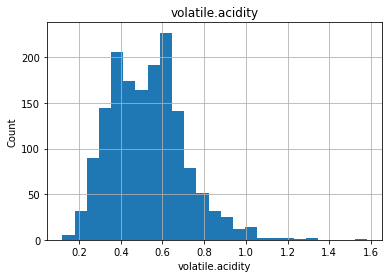

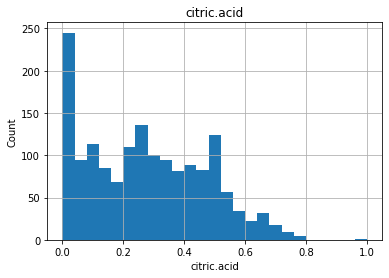

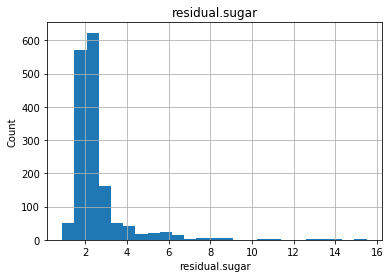

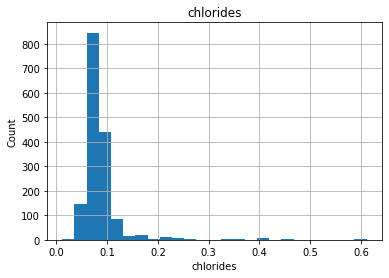

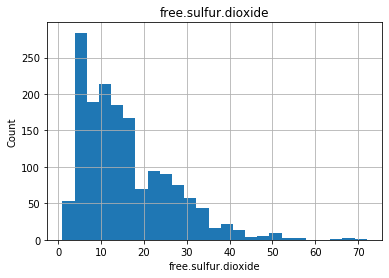

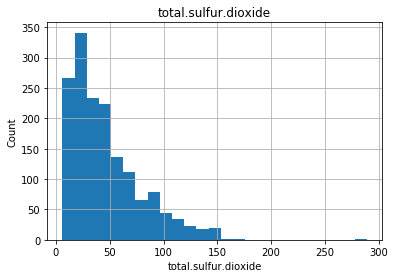

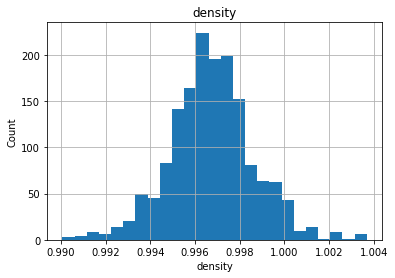

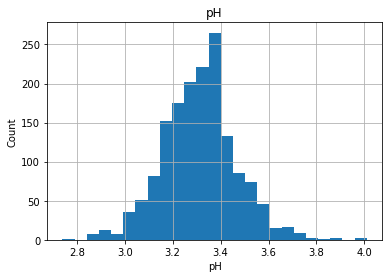

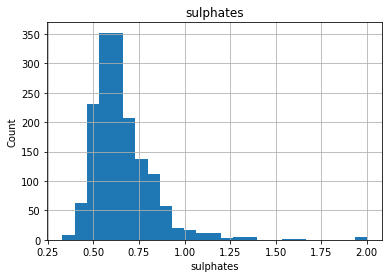

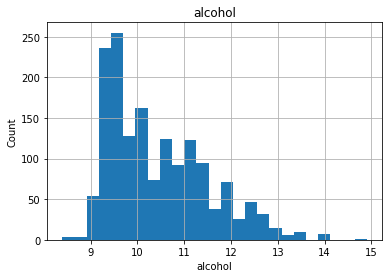

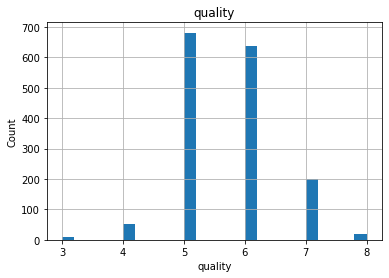

In [8]:
cols=['fixed.acidity','volatile.acidity','citric.acid','residual.sugar','chlorides','free.sulfur.dioxide','total.sulfur.dioxide','density','pH','sulphates','alcohol','quality']
for feature in cols:
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

# Bivariate Analysis

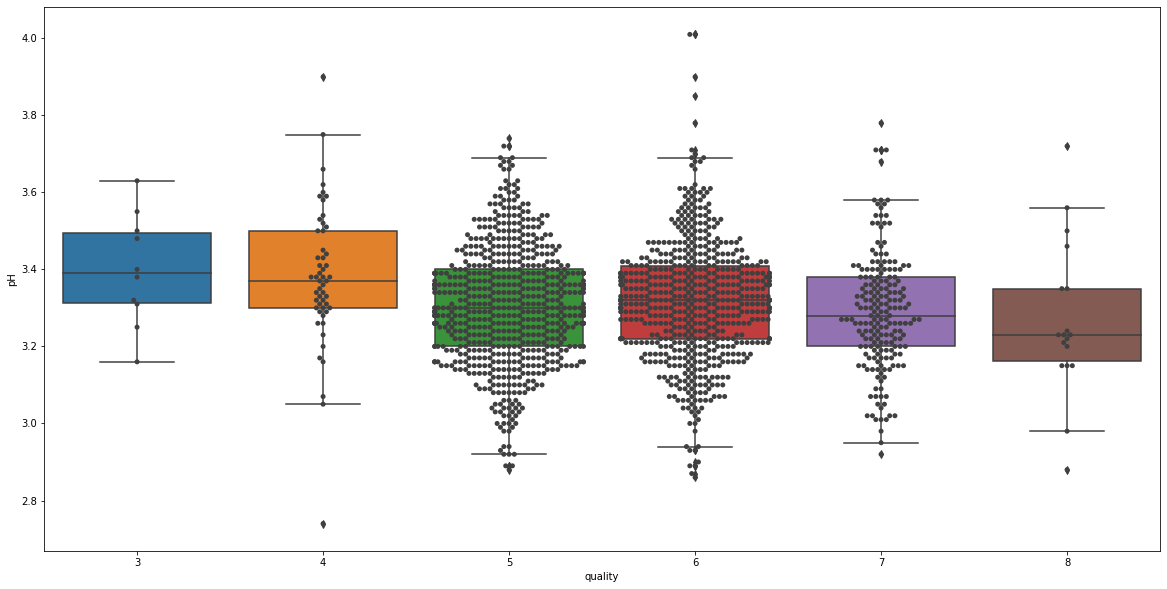

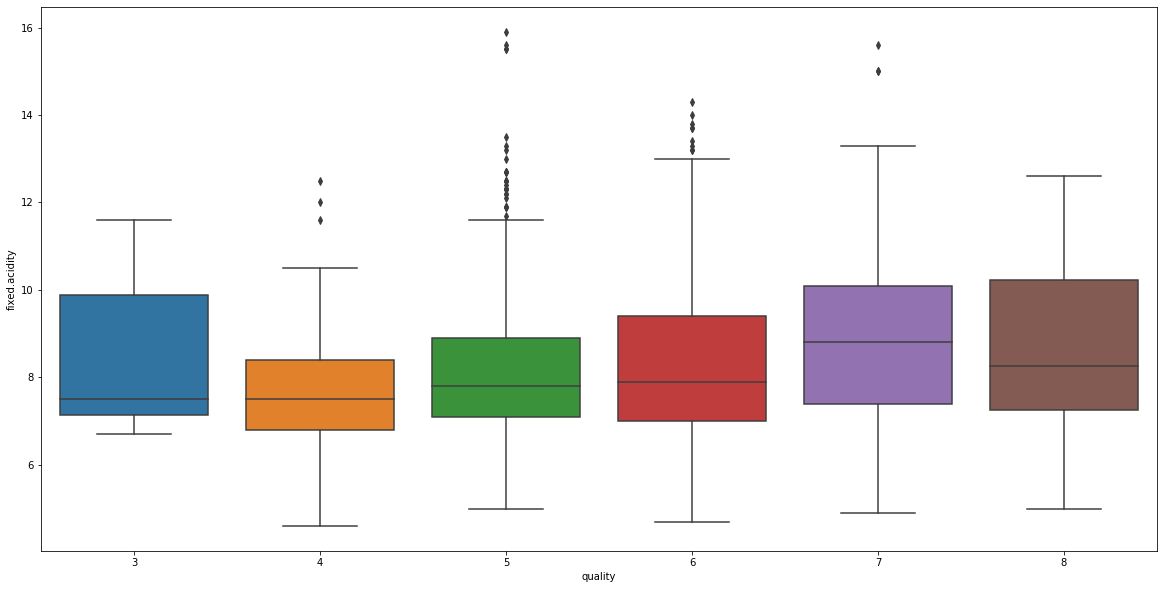

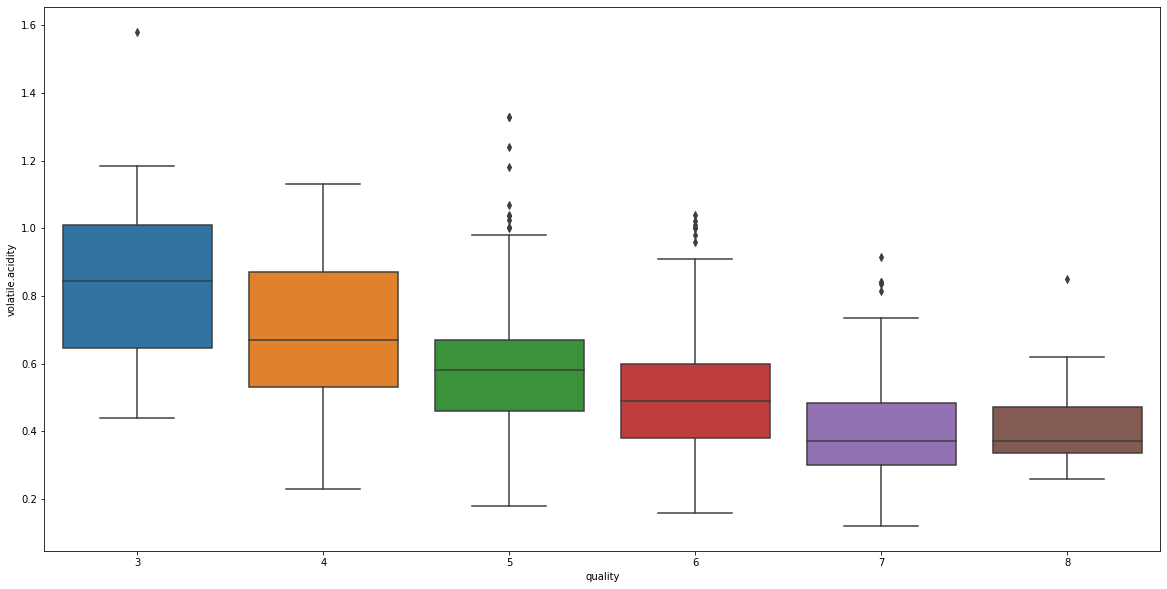

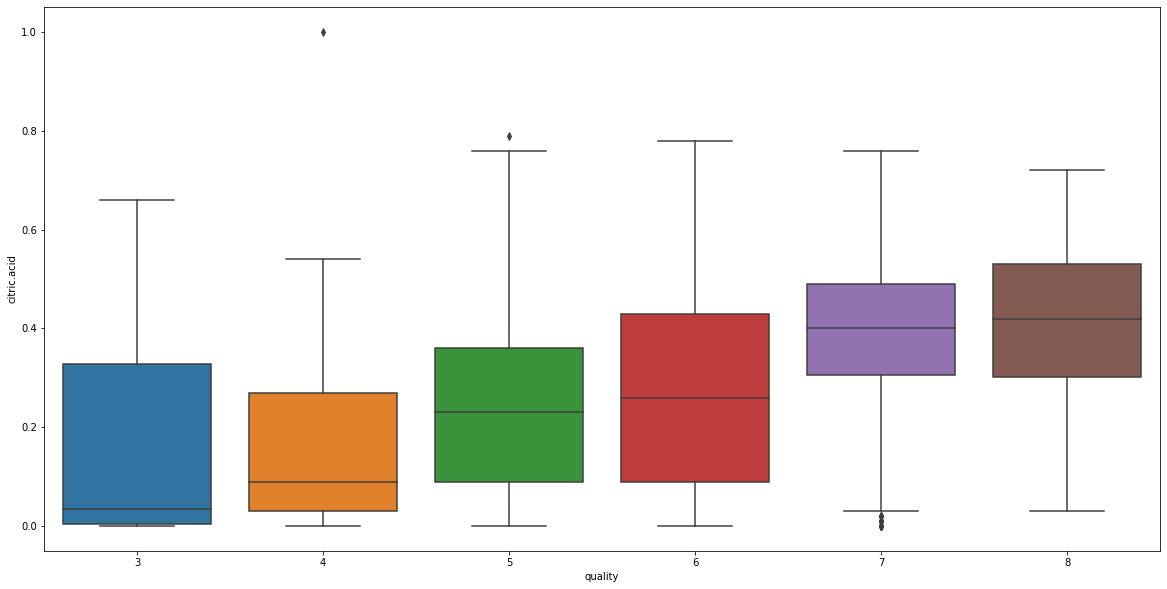

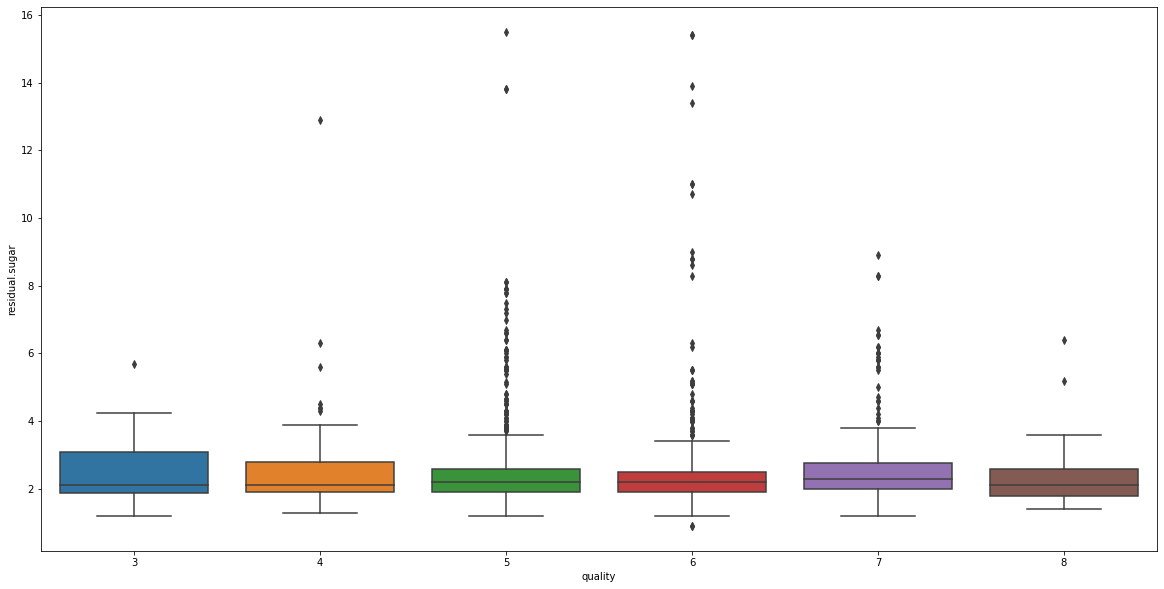

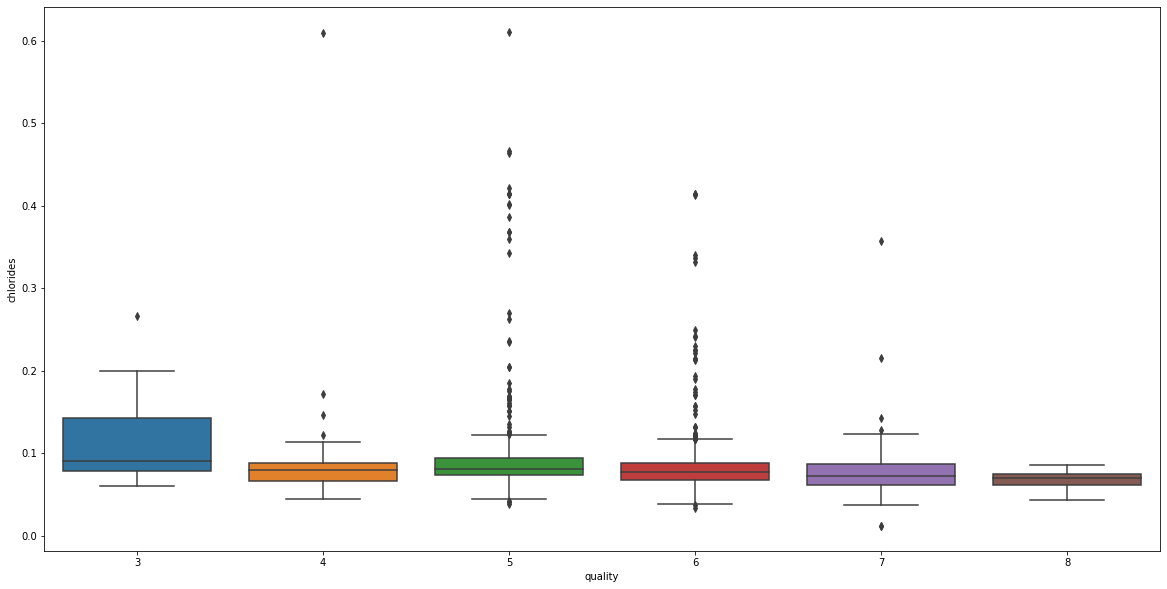

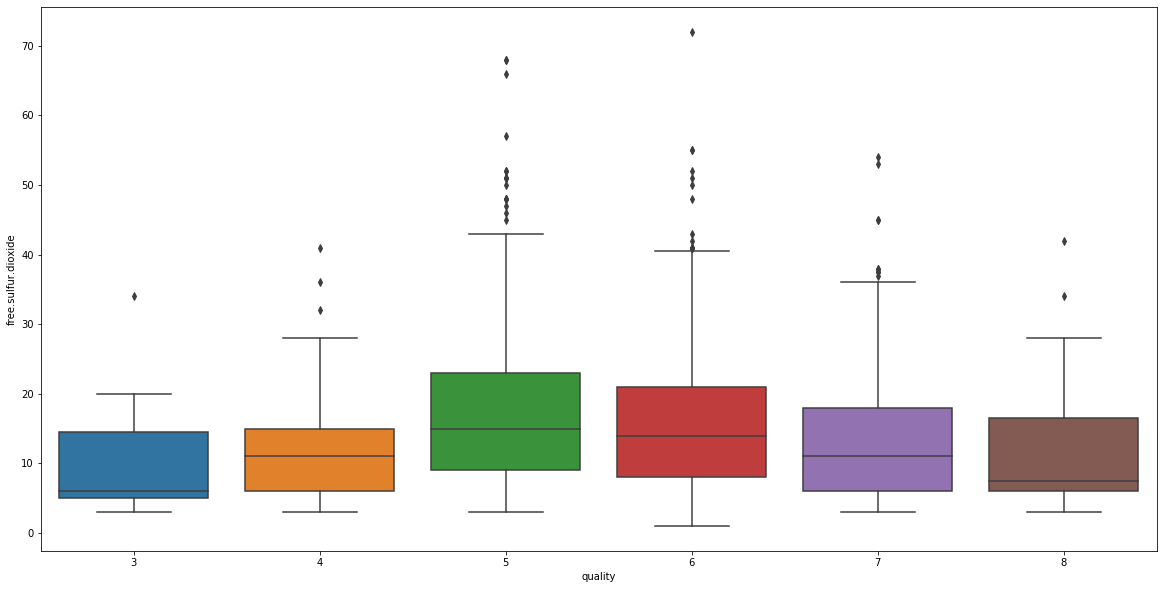

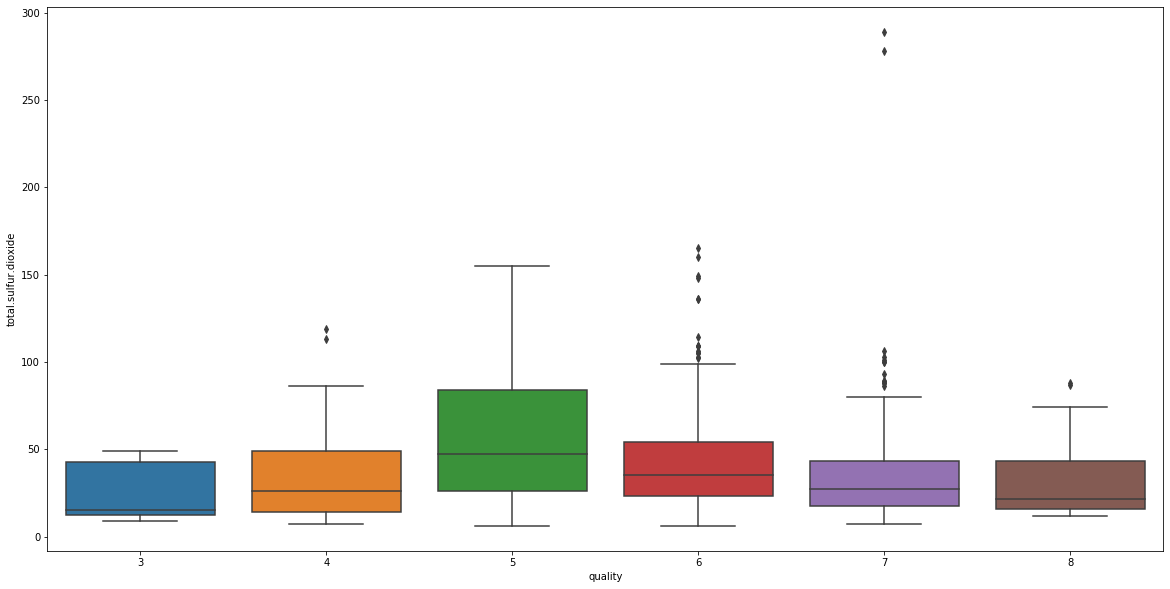

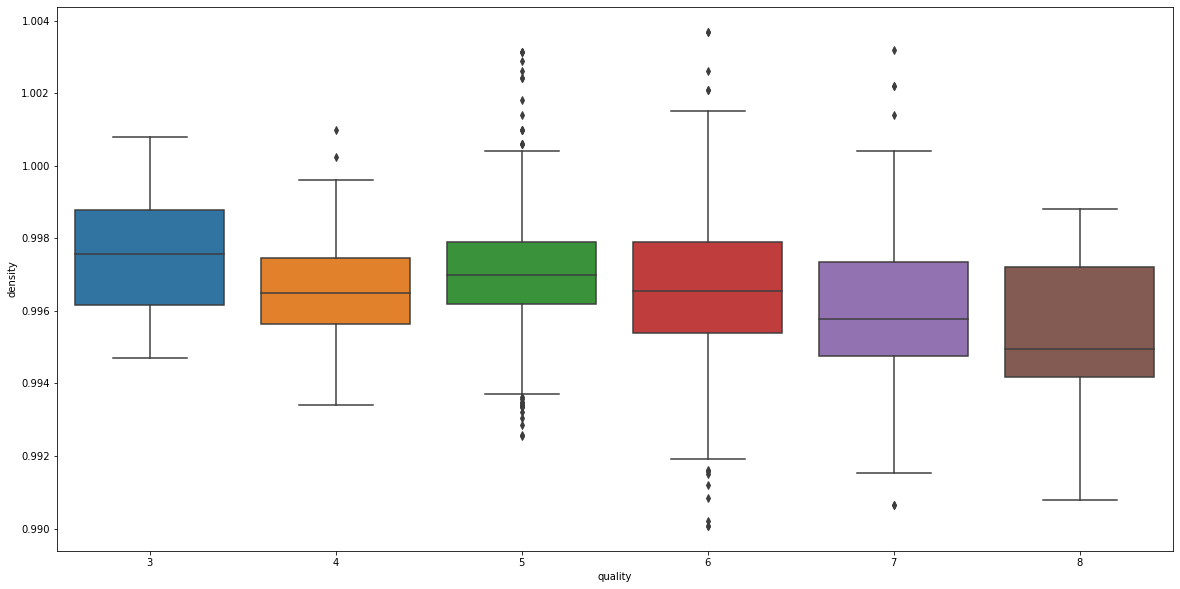

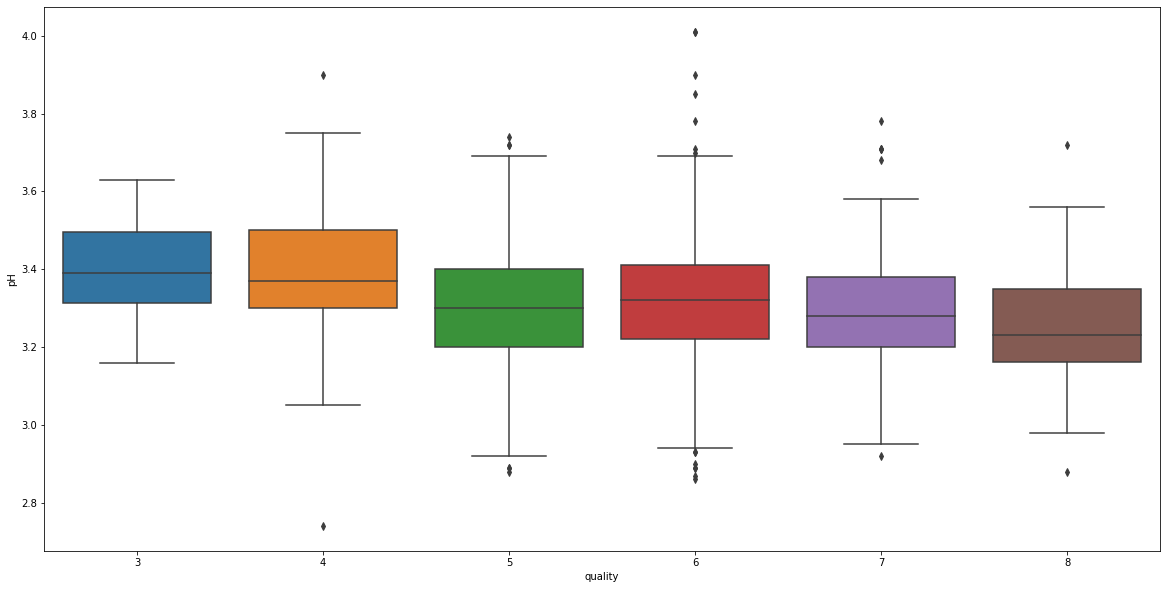

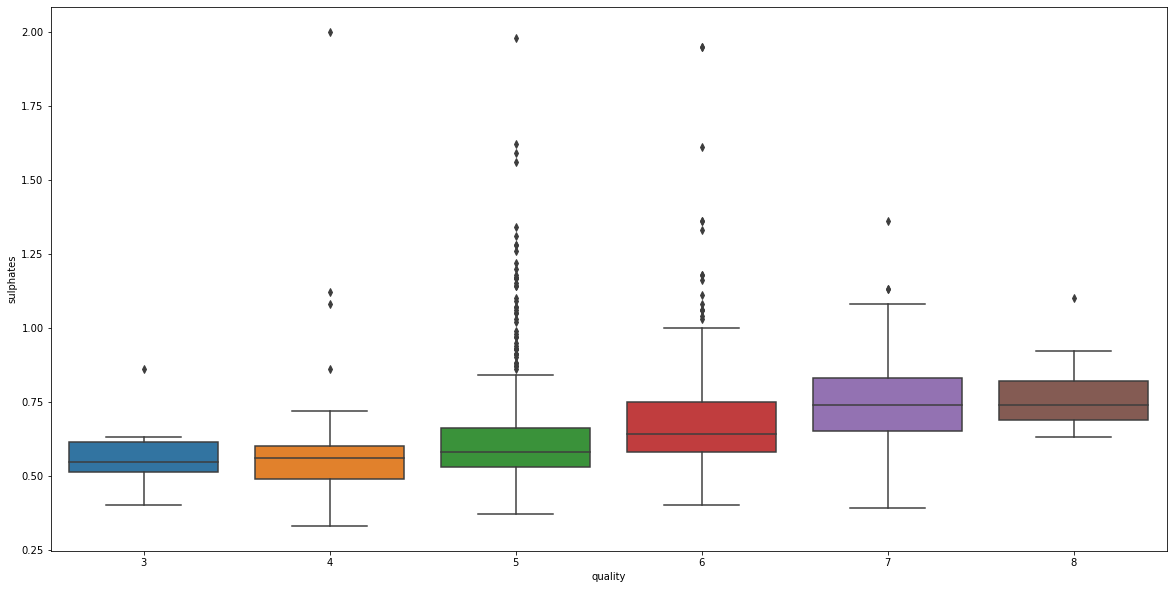

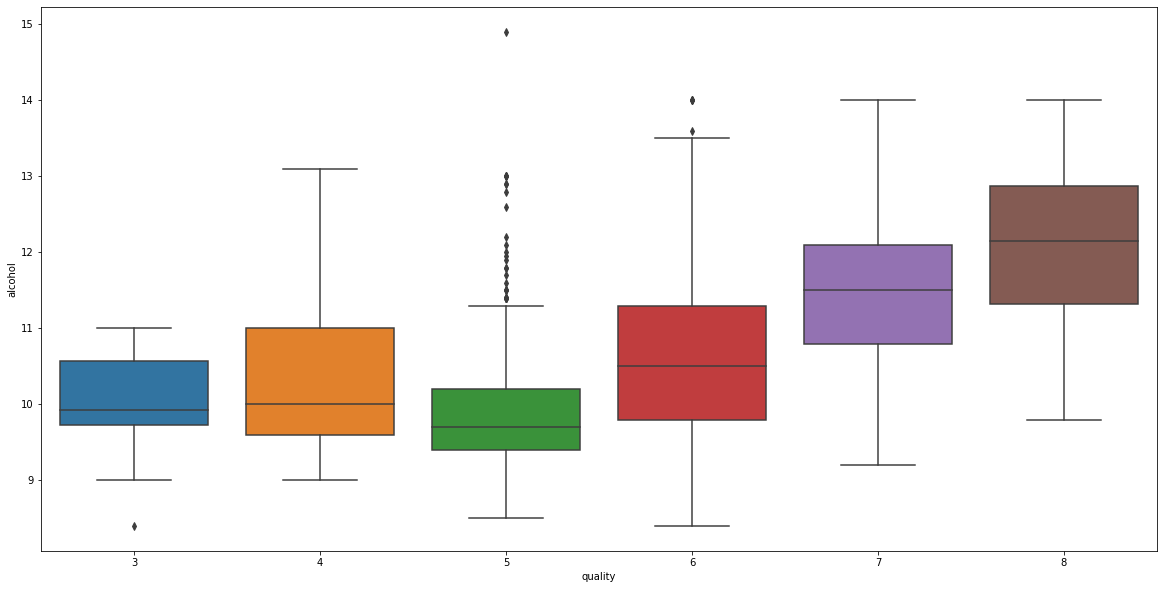

In [9]:
plt.figure(figsize=(20,10))
sns.boxplot(orient='v',data=data,y="pH",x="quality")
sns.swarmplot(data=data,y="pH",x="quality", color=".25")
plt.show()
cols.remove('quality')
for col in cols:
    plt.figure(figsize=(20,10))  
    sns.boxplot(orient='v',data=data,y=col,x="quality")
    plt.show()

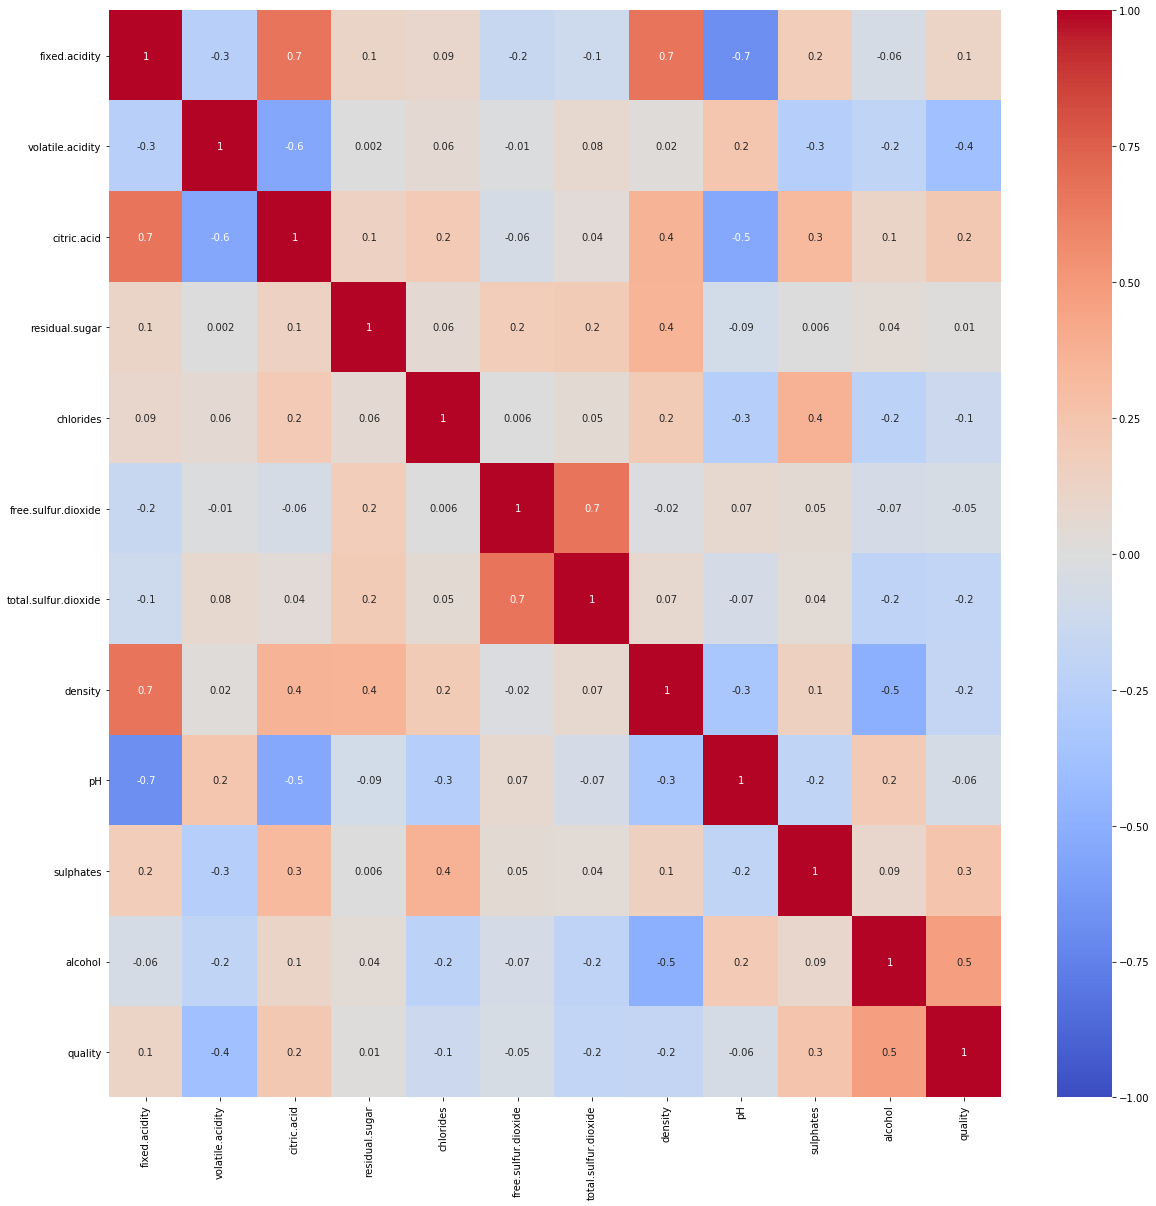

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot = True,fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

From above zoomed heatmap it is observed that fixed.acidity & density are closely correlated . Similarly TotalBsmtSF and 1stFlrSF are also closely correlated.

## My observations :

* 'citric.acid', 'density' and 'pH' are strongly correlated with 'fixed.acidity'.

* 'free.sulfur.dioxide' and 'total.sulfur.dioxide' also seem to be twins. In this case let us keep 'total.sulfur.dioxide'

* 'citric.acid' it appears like is slightly correlated with 'volatile.acidity'. This required more analysis to arrive at a conclusion.

C:\Users\Snow\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


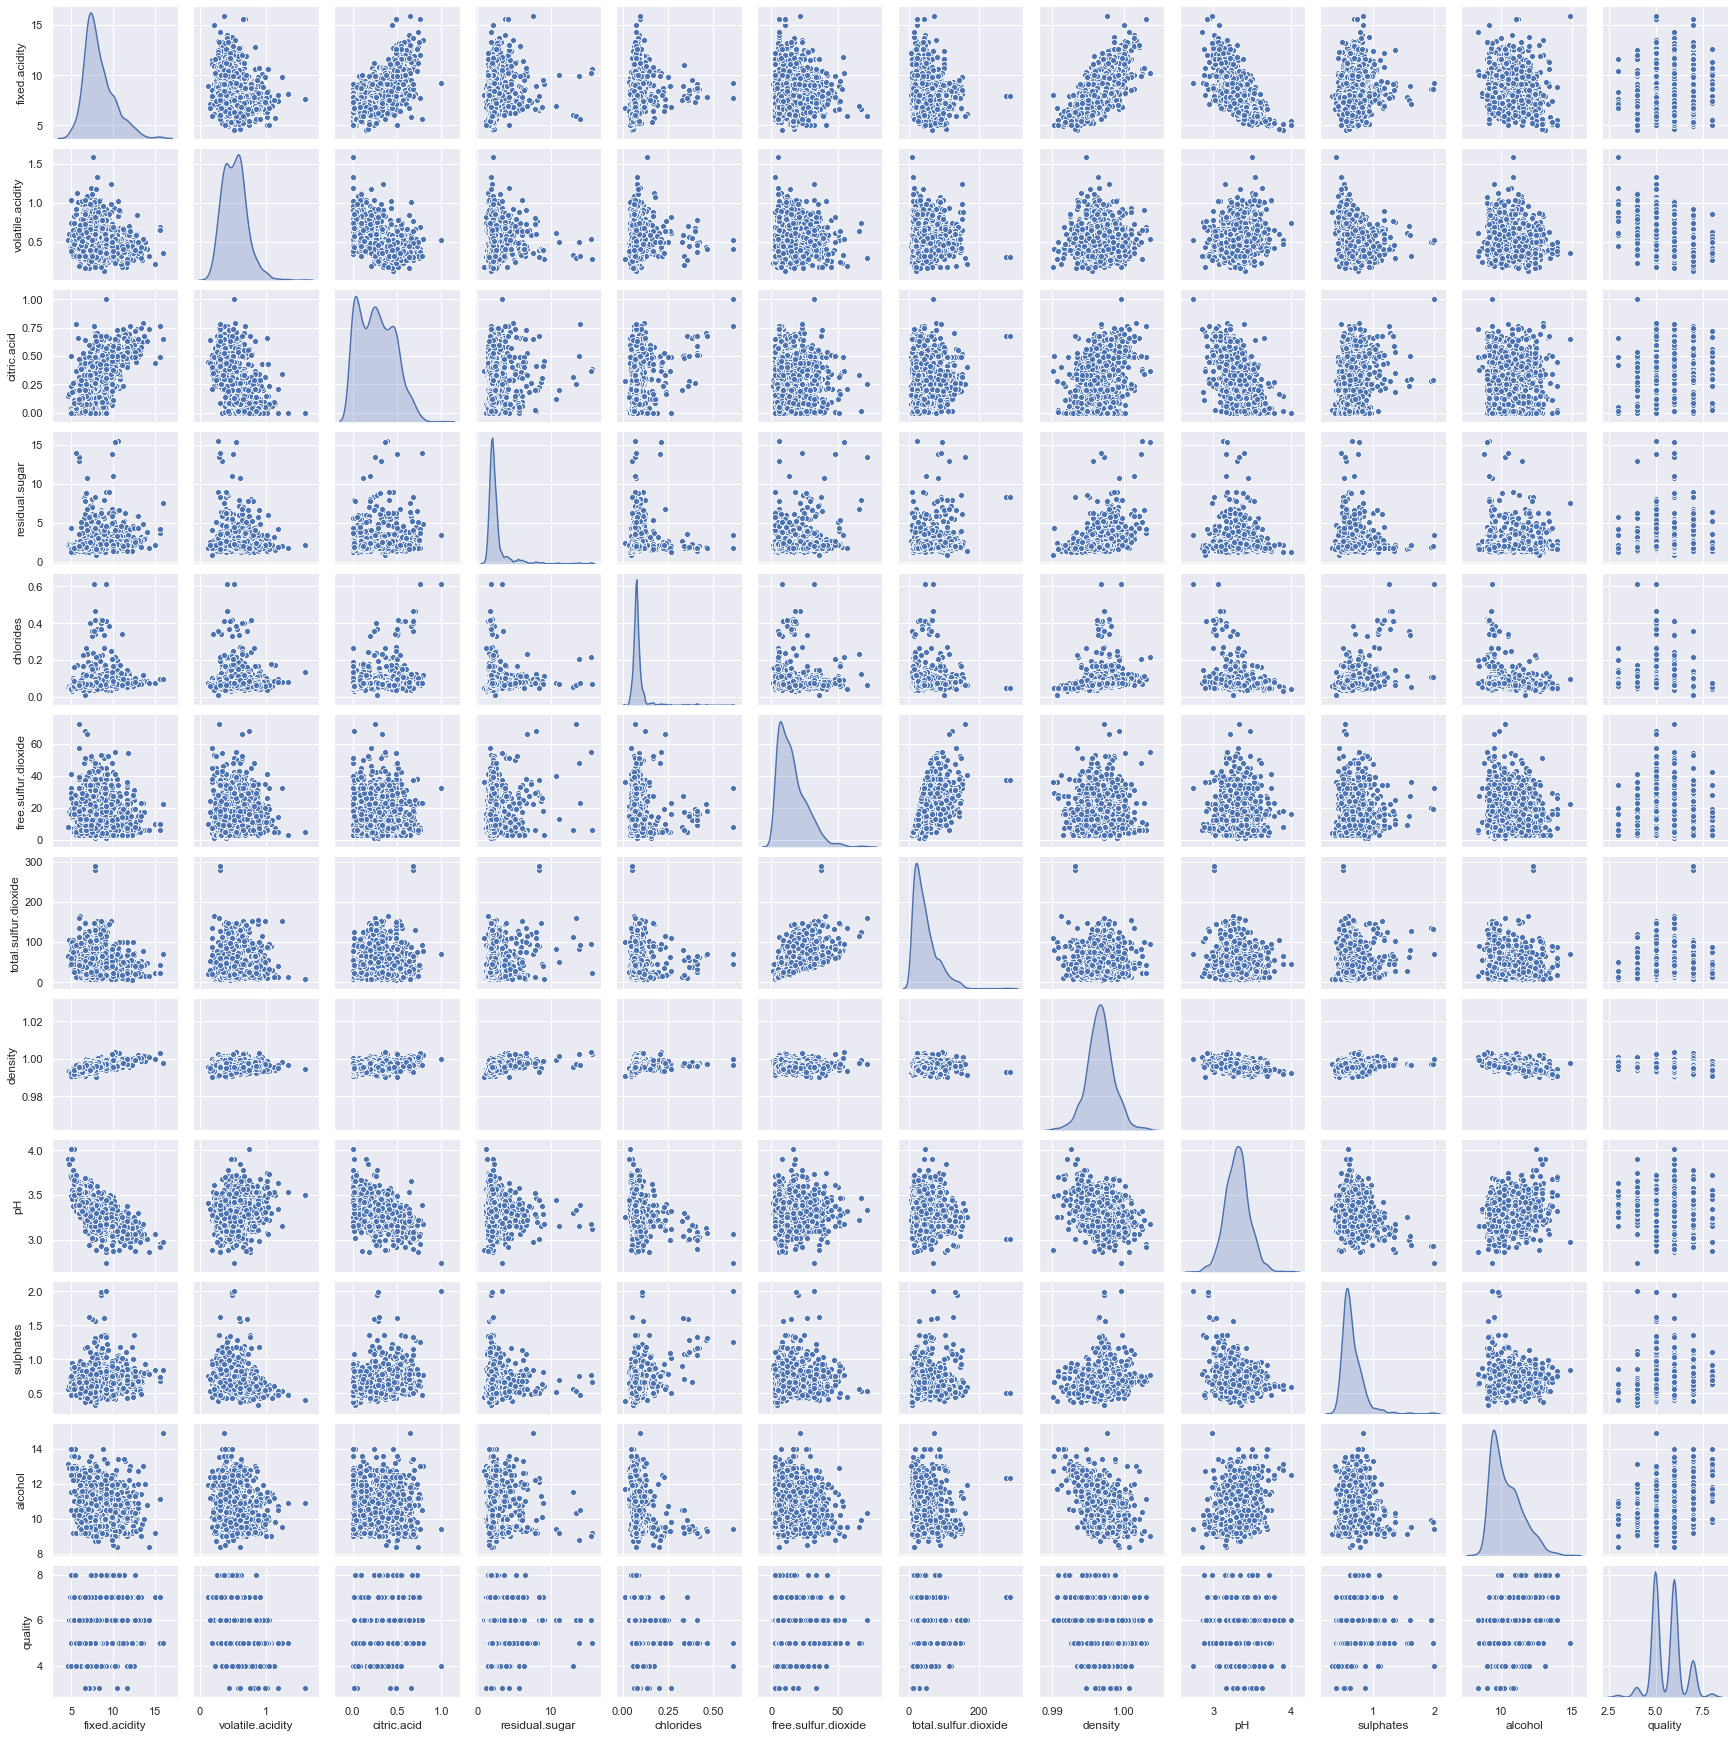

In [11]:
sns.set()
sns.pairplot(data,size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

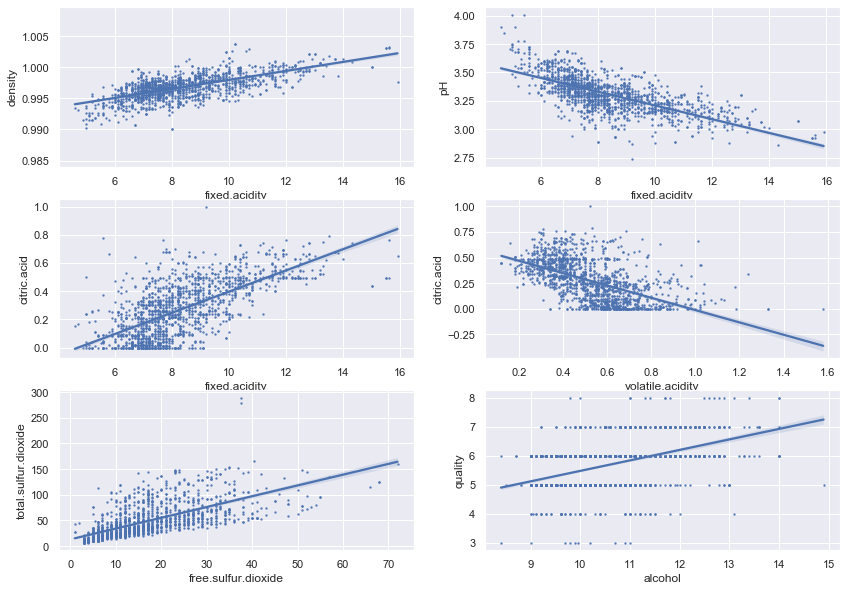

In [20]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(14,10))

sns.regplot(x="fixed.acidity",y="density",data=data,ax=ax1,scatter_kws={'s':2})
sns.regplot(x="fixed.acidity",y="pH",data=data,ax=ax2,scatter_kws={'s':2})
sns.regplot(x="fixed.acidity",y="citric.acid",data=data,ax=ax3,scatter_kws={'s':2})
sns.regplot(x="volatile.acidity",y="citric.acid",data=data,ax=ax4,scatter_kws={'s':2})
sns.regplot(x="free.sulfur.dioxide",y="total.sulfur.dioxide",data=data,ax=ax5,scatter_kws={'s':2})
sns.regplot(x="alcohol",y="quality",data=data,ax=ax6,scatter_kws={'s':2})

# Multivariate Analysis

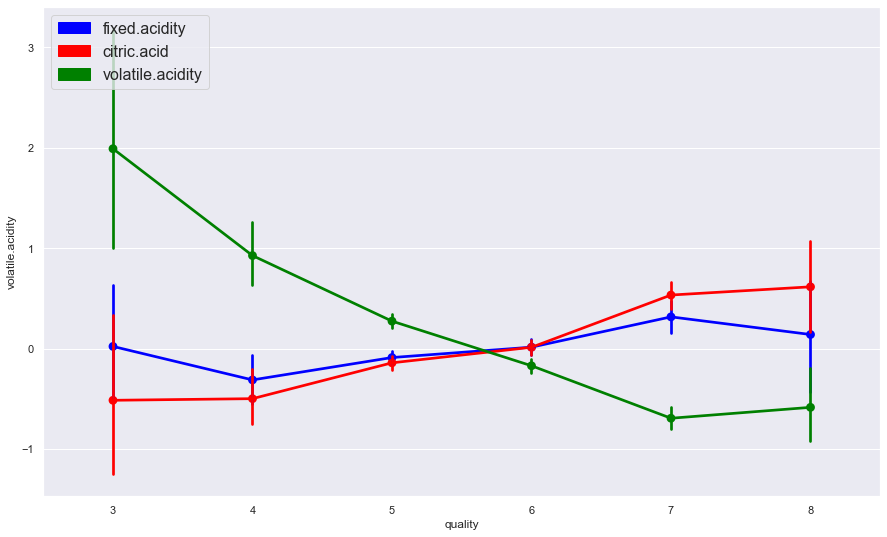

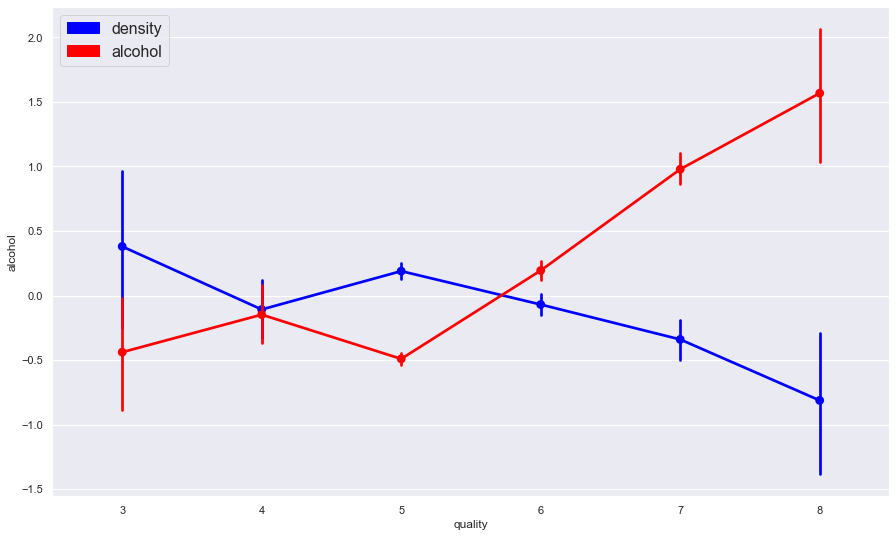

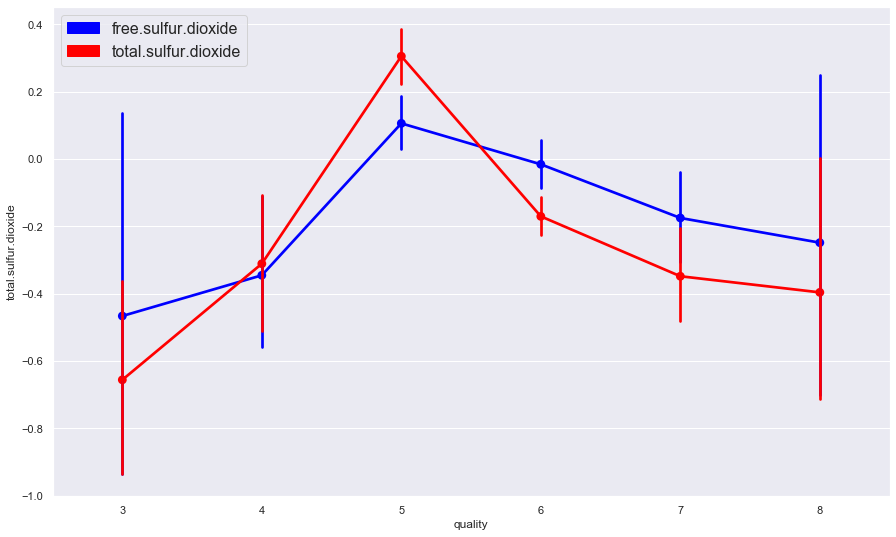

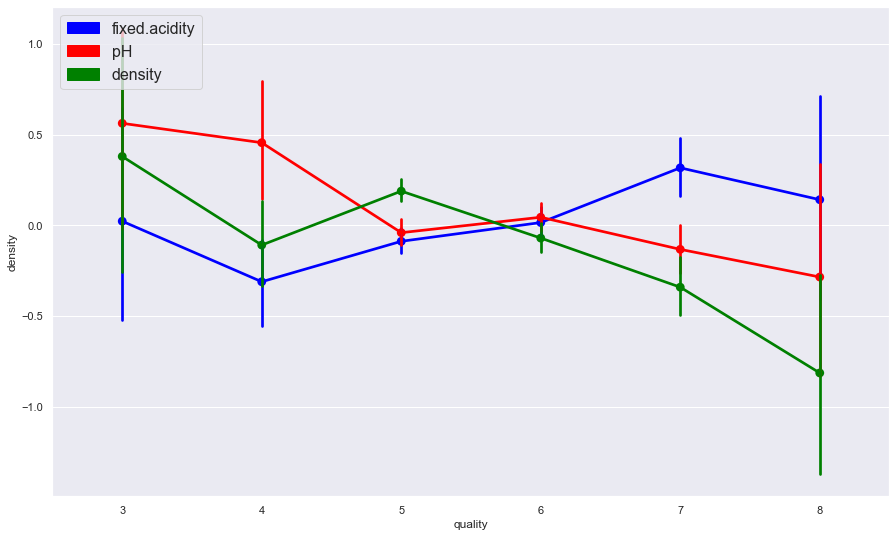

In [13]:
normalised_df = pd.DataFrame()
for col in cols:
    normalised_df[col] = data[col]
    
normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std()#(normalised_df.max() - normalised_df.min()) 
normalised_df['quality'] = data['quality']


#Plot
plt.figure(figsize=(15, 9))
ax = sns.pointplot(x = normalised_df['quality'], y = normalised_df['fixed.acidity'], color = 'blue', label='fixed.acidity')
ax = sns.pointplot(x = normalised_df['quality'], y = normalised_df['citric.acid'], color = 'red', label='citric.acid')
ax = sns.pointplot(x = normalised_df['quality'], y = normalised_df['volatile.acidity'], color = 'green', label='volatile.acidity')

blue_patch = mpatches.Patch(color='blue', label='fixed.acidity')
red_patch = mpatches.Patch(color='red', label='citric.acid')
green_patch = mpatches.Patch(color='green', label='volatile.acidity')
plt.legend(handles=[blue_patch, red_patch,green_patch], loc='upper left', fontsize = 16)
plt.show()

plt.figure(figsize=(15, 9))
ax = sns.pointplot(x = normalised_df['quality'], y = normalised_df['density'], color = 'blue', label='density')
ax = sns.pointplot(x = normalised_df['quality'], y = normalised_df['alcohol'], color = 'red', label='alcohol')

blue_patch = mpatches.Patch(color='blue', label='density')
red_patch = mpatches.Patch(color='red', label='alcohol')
plt.legend(handles=[blue_patch, red_patch], loc='upper left', fontsize = 16)
plt.show()



plt.figure(figsize=(15, 9))
ax = sns.pointplot(x = normalised_df['quality'], y = normalised_df['free.sulfur.dioxide'], color = 'blue', label='free.sulfur.dioxide')
ax = sns.pointplot(x = normalised_df['quality'], y = normalised_df['total.sulfur.dioxide'], color = 'red', label='total.sulfur.dioxide')

blue_patch = mpatches.Patch(color='blue', label='free.sulfur.dioxide')
red_patch = mpatches.Patch(color='red', label='total.sulfur.dioxide')
plt.legend(handles=[blue_patch, red_patch], loc='upper left', fontsize = 16)
plt.show()

plt.figure(figsize=(15, 9))
ax = sns.pointplot(x = normalised_df['quality'], y = normalised_df['fixed.acidity'], color = 'blue', label='fixed.acidity')
ax = sns.pointplot(x = normalised_df['quality'], y = normalised_df['pH'], color = 'red', label='pH')
ax = sns.pointplot(x = normalised_df['quality'], y = normalised_df['density'], color = 'green', label='density')

blue_patch = mpatches.Patch(color='blue', label='fixed.acidity')
red_patch = mpatches.Patch(color='red', label='pH')
green_patch = mpatches.Patch(color='green', label='density')
plt.legend(handles=[blue_patch, red_patch,green_patch], loc='upper left', fontsize = 16)
plt.show()

In [14]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

scaled_data=preprocessing.scale(data.T)
pca=PCA()
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) 


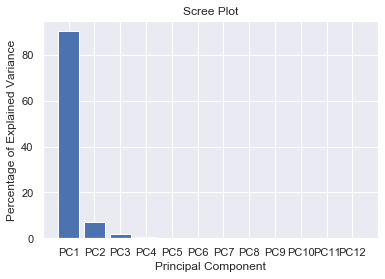

In [15]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

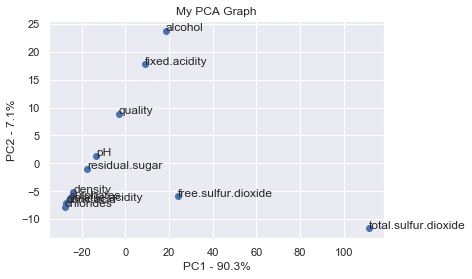

In [23]:
cols=['fixed.acidity','volatile.acidity','citric.acid','residual.sugar','chlorides','free.sulfur.dioxide','total.sulfur.dioxide','density','pH','sulphates','alcohol','quality']

pca_df = pd.DataFrame(pca_data,index=cols, columns=labels)
#plt.figure(figsize=(10, 30))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))


for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()